# Дифференцирование

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html#matplotlib.pyplot.axhline
* https://numpy.org/doc/stable/reference/generated/numpy.log1p.html#numpy.log1p
* https://docs.sympy.org/latest/tutorials/intro-tutorial/calculus.html
* https://en.wikipedia.org/wiki/Finite_difference
* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter20.02-Finite-Difference-Approximating-Derivatives.html
* https://en.wikipedia.org/wiki/Gradient_descent
* https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
* https://zhang-yang.medium.com/the-gradient-argument-in-pytorchs-backward-function-explained-by-examples-68f266950c29

## Задачи для совместного разбора

1\. Дана функция $f(x) = x^2$. Найдите производную этой функции различными способами

In [ ]:
def f(x):
  return x**2

def dfdx(x):
  return 2*x

In [ ]:
dfdx(10)

20

In [ ]:
# x**2/sin(x)

In [ ]:
import sympy

In [ ]:
x_s = sympy.symbols("x")
f_s = x_s ** 2
f_s

x**2

In [ ]:
dfdx_s = sympy.diff(f_s, x_s)
dfdx_s

2*x

In [ ]:
dfdx_s.evalf(subs={"x": 10})

20.0000000000000

In [ ]:
def dfdx_n(f, x, h=1e-5):
  return (f(x+h) - f(x)) / h

In [ ]:
dfdx_n(f, 10)

20.00000999942131

In [ ]:
import torch as th

In [ ]:
x = th.tensor(5.0, requires_grad=True)
y = f(x)
# z = y + 5
# t = z * 2
y.backward()
x.grad

tensor(10.)

In [ ]:
x = th.linspace(0, 9, steps=3, requires_grad=True)
y = f(x)
z = y.sum() # x1^2 + x2^2 + x3^2
z.backward()
x.grad # [dz/dx1 dz/dx2 dz/dx3]

tensor([ 0.,  9., 18.])

In [ ]:
x = th.linspace(0, 9, steps=3, requires_grad=True)
y = f(x)
y.backward(th.tensor([1, 2, 3]))
x.grad

tensor([ 0., 18., 54.])

In [ ]:
x1, x2, x3 = x
J = th.tensor([
    [2*x1, 0, 0],
    [0, 2*x2, 0],
    [0, 0, 2*x3]
])

In [ ]:
v = th.ones_like(x)
J.T @ v

tensor([ 0.,  9., 18.])

## Задачи для самостоятельного решения

1\. Дана функция $f(x)$. Найдите (аналитически) производную данной функции $f'(x)$ и реализуйте две этих функции. Постройте в одной системе координат графики $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

$$f' = \frac{cos(x)(\ln(x)+1)-sin(x) \cdot \frac{1}{x}}{(\ln(x)+1)^2}$$

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

<ipython-input-2-2b90ccaace58>:2: RuntimeWarning: divide by zero encountered in log
  ys = (np.cos(xs)*(np.log(xs)+1) - np.sin(xs)/xs) / (np.log(xs)+1)**2
<ipython-input-2-2b90ccaace58>:2: RuntimeWarning: invalid value encountered in divide
  ys = (np.cos(xs)*(np.log(xs)+1) - np.sin(xs)/xs) / (np.log(xs)+1)**2


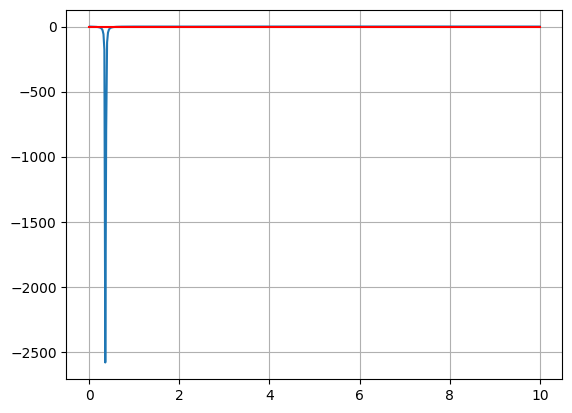

In [2]:
xs = np.linspace(0,10,500)
ys = (np.cos(xs)*(np.log(xs)+1) - np.sin(xs)/xs) / (np.log(xs)+1)**2

plt.plot(xs,ys)
plt.plot([0,10],[0,0], c='r')
plt.grid()

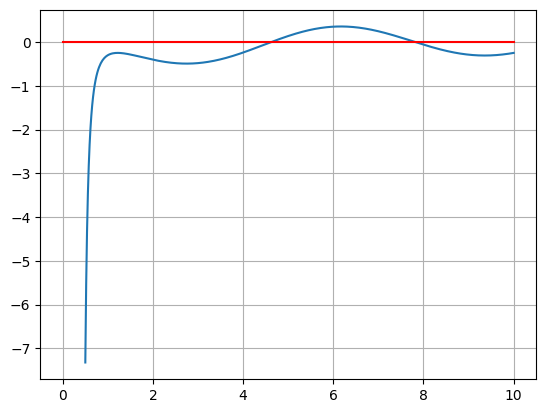

In [3]:
xs = np.linspace(0.5,10,500)
ys = (np.cos(xs)*(np.log(xs)+1) - np.sin(xs)/xs) / (np.log(xs)+1)**2

plt.plot(xs,ys)
plt.plot([0,10],[0,0], c='r')
plt.grid()

2\. Дана функция $f(x)$. Найдите (используя символьные вычисления) производную данной функции $f'(x)$. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [4]:
x = sp.symbols('x')
f = sp.sin(x)/(sp.ln(x)+1)
dfdx = f.diff()
dfdx

cos(x)/(log(x) + 1) - sin(x)/(x*(log(x) + 1)**2)

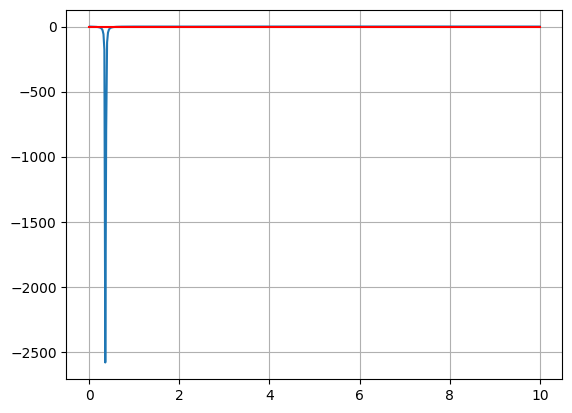

In [5]:
xs2 = np.linspace(0,10,500)
ys2 = [dfdx.subs(x,xi) for xi in xs2]


plt.plot(xs2,ys2)
plt.plot([0,10],[0,0], c='r')
plt.grid()

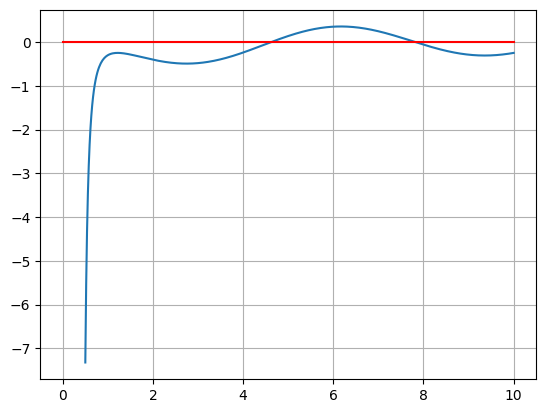

In [6]:
xs2 = np.linspace(0.5,10,500)
ys2 = [dfdx.subs(x,xi) for xi in xs2]


plt.plot(xs2,ys2)
plt.plot([0,10],[0,0], c='r')
plt.grid()

3\. Дана функция $f(x)$. Найдите (численно) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [7]:
def func3(x):
  return np.sin(x)/(np.log(x)+1)

def dfdx_n(f, x, h=1e-10):
  return (f(x+h) - f(x)) / h

<ipython-input-7-8ec37cfddb2f>:2: RuntimeWarning: divide by zero encountered in log
  return np.sin(x)/(np.log(x)+1)


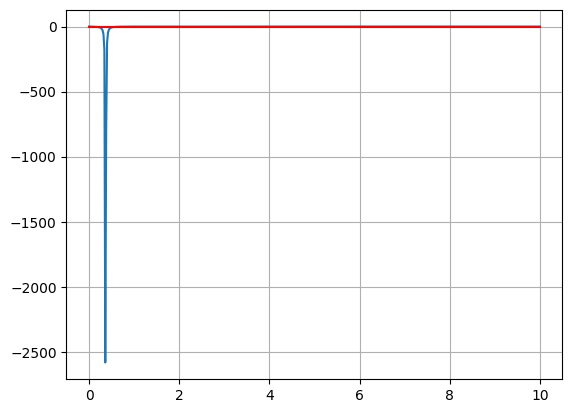

In [8]:
xs3 = np.linspace(0,10,500)
ys3 = dfdx_n(func3, xs3)


plt.plot(xs3,ys3)
plt.plot([0,10],[0,0], c='r')
plt.grid()

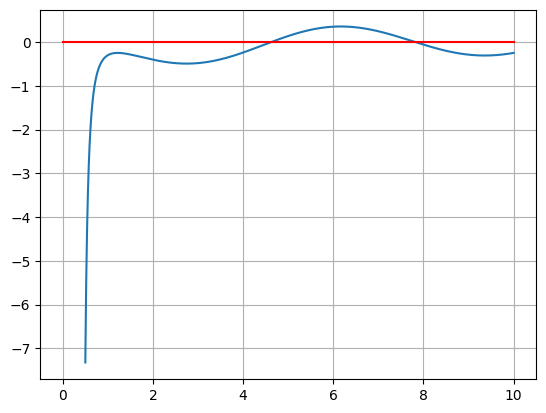

In [9]:
xs3 = np.linspace(0.5,10,500)
ys3 = dfdx_n(func3, xs3)


plt.plot(xs3,ys3)
plt.plot([0,10],[0,0], c='r')
plt.grid()

4\. Найдите локальный минимум функции $f(x)$ при помощи метода градиетного спуска. В качестве начальной точки используйте $x_0 = 4$. Найдите локальный максимум этой же функции, используя в качестве начальной точки $x_0'=9$.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

$$x_{k+1} = x_k - \alpha \cdot \nabla f$$

In [10]:
x0_min = 4
alpha = 0.01
eps = 1e-6
fl = True

while fl:
  cur = x0_min
  x0_min = x0_min - alpha*float(dfdx.subs(x,x0_min))
  fl = abs(cur-x0_min) > eps

x0_min

4.626984148445977

In [11]:
x0_max = 9
alpha = 0.01
eps = 1e-6
fl = True

while fl:
  cur = x0_max
  x0_max = x0_max + alpha*float(dfdx.subs(x,x0_max))
  fl = abs(cur-x0_max) > eps

x0_max

7.812420491492213

5\. Дана функция $f(x)$. Найдите (используя возможности по автоматическому дифференцированию пакета `torch`) производную данной функции $f'(x)$ на отрезке [0, 10]. Постройте в одной системе координат график $f(x)$, $f'(x)$ и $g(x) = 0$ на отрезке [0, 10]. Изобразите графики различными цветами и включите сетку.

$$f(x) = \frac{sin(x)}{\ln(x) + 1}$$

In [12]:
import torch as th

In [13]:
th.log(th.tensor([2.7])), type(th.tensor([2.7]))

(tensor([0.9933]), torch.Tensor)

In [14]:
def func5(x: th.Tensor):
  return th.sin(x) / (th.log(x)+1)

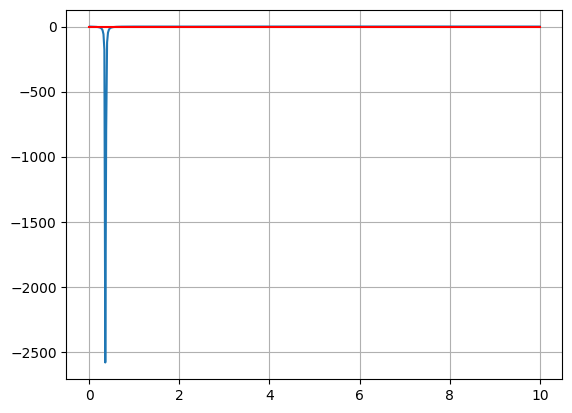

In [15]:
xs5 = th.linspace(0,10,500,requires_grad=True)
dfdx5 = func5(xs5)
dfdx5.backward(th.ones_like(xs5))
ys5 = xs5.grad

plt.plot(xs5.detach().numpy(),ys5)
plt.plot([0,10],[0,0], c='r')
plt.grid()

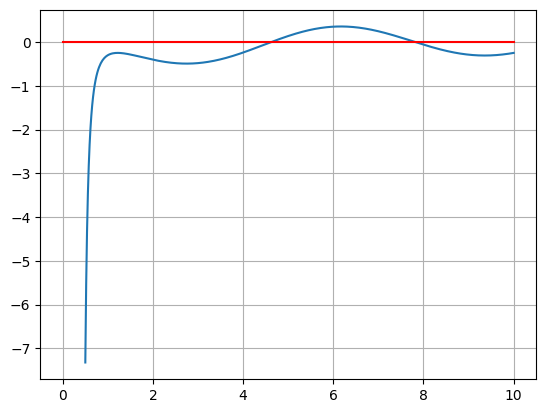

In [16]:
xs5 = th.linspace(0.5,10,500,requires_grad=True)
dfdx5 = func5(xs5)
dfdx5.backward(th.ones_like(xs5))
ys5 = xs5.grad

plt.plot(xs5.detach().numpy(),ys5)
plt.plot([0,10],[0,0], c='r')
plt.grid()

6\. Дана функция $f(x)$. Найдите производную данной функции $f'(x)$ на отрезке [0, 10] при помощи формулы производной сложной функции. На этом же отрезке найдите, используя возможности по автоматическому дифференцированию пакета `torch`. Сравните результаты.

$$f(x) = sin(cos(x))$$

$$f' = cos(cos(x)) \cdot (-sin(x))$$

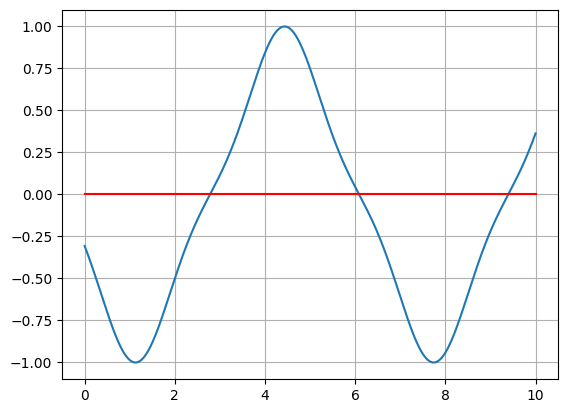

In [17]:
xs6 = np.linspace(0,10,500)
ys6 = -np.sin(xs)*np.cos(np.cos(xs))

plt.plot(xs6,ys6)
plt.plot([0,10],[0,0], c='r')
plt.grid()

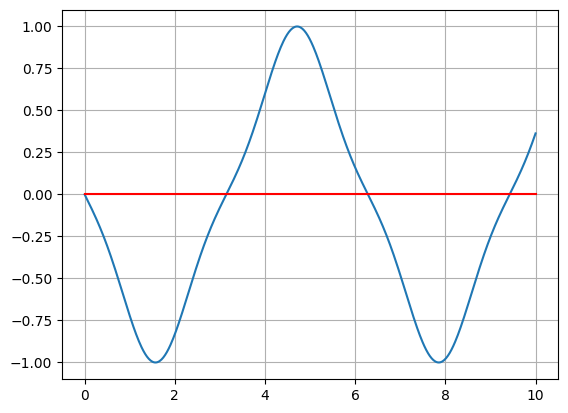

In [18]:
def func6(x):
  return th.sin(th.cos(x))

xs6 = th.linspace(0,10,500,requires_grad=True)
f6 = func6(xs6)
f6.backward(th.ones_like(xs6))
ys6 = xs6.grad

plt.plot(xs6.detach().numpy(),ys6)
plt.plot([0,10],[0,0], c='r')
plt.grid()